In [14]:
import time
import requests
import json
import csv

time_stamp = int(time.time())
print(f"Now timestamp: {time_stamp}")
# 1367107200
request_link = f"https://web-api.coinmarketcap.com/v1/cryptocurrency/ohlcv/historical?convert=USD&slug=bitcoin&time_end={time_stamp}&time_start=1367107200"
print("Request link: " + request_link)
r = requests.get(url = request_link)
#print(r.content)
content = json.loads(r.content)
#print(type(content))
quoteList = content['data']['quotes']
#print(quoteList)

# for windows, newline=''
with open('BTC.csv','w' ,encoding='utf8',newline='') as f:
    csv_write = csv.writer(f)
    csv_head = ["Date","Price","Volume"]
    csv_write.writerow(csv_head)
    
    for quote in quoteList:
        quote_date = quote["time_open"][:10]
        quote_price = "{:.2f}".format(quote["quote"]["USD"]["close"])
        quote_volume = "{:.2f}".format(quote["quote"]["USD"]["volume"])
        csv_write.writerow([quote_date, quote_price, quote_volume])

print("Done")

Now timestamp: 1582511087
Request link: https://web-api.coinmarketcap.com/v1/cryptocurrency/ohlcv/historical?convert=USD&slug=bitcoin&time_end=1582511087&time_start=1367107200
Done


In [3]:
import pandas as pd

series = pd.DataFrame()
df = pd.read_csv("BTC.csv")
series['Date'] = df['Date'].tolist()
series['Price'] = df['Price'].tolist()
series['Volume'] = df['Volume'].tolist()

print(series)

            Date    Price        Volume
0     2013-04-29   144.54  0.000000e+00
1     2013-04-30   139.00  0.000000e+00
2     2013-05-01   116.99  0.000000e+00
3     2013-05-02   105.21  0.000000e+00
4     2013-05-03    97.75  0.000000e+00
...          ...      ...           ...
2487  2020-02-19  9633.39  4.699202e+10
2488  2020-02-20  9608.48  4.492526e+10
2489  2020-02-21  9686.44  4.093055e+10
2490  2020-02-22  9663.18  3.583803e+10
2491  2020-02-23  9924.52  4.118519e+10

[2492 rows x 3 columns]


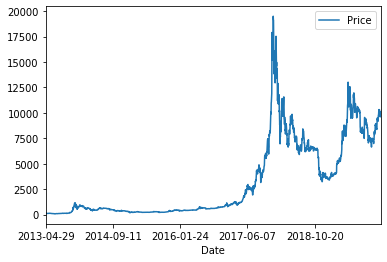

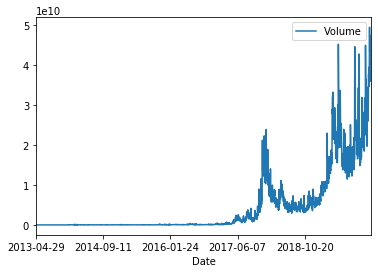

In [14]:
import matplotlib.pyplot as plt

ax = plt.gca()
series.plot(kind='line', x='Date', y='Price',ax=ax)
plt.show()

plt.cla()
ax = plt.gca()
series.plot(kind='line', x='Date', y='Volume',ax=ax)
plt.show()
